<a href="https://colab.research.google.com/github/beryl09/beryl09/blob/main/ps1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

My analysis is based on the weather change on temperature  between a range of 10 years in New Jersey

Data source: https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/county/mapping

In [9]:
import pandas as pd

import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [2]:
!pip install mapclassify
import mapclassify #need for thematic map classification

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 1.2 MB/s eta 0:00:00


In [3]:
! wget -q -O nj-counties.zip https://docs.google.com/uc?id=1xJDhcRCkgv7k4tNCa72Oog5bohV6dTB2&export=download

zip_ref = zipfile.ZipFile('nj-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
nj_counties=gpd.read_file('nj_counties.shp') #load the shapefile with gpd as njC


<Axes: >

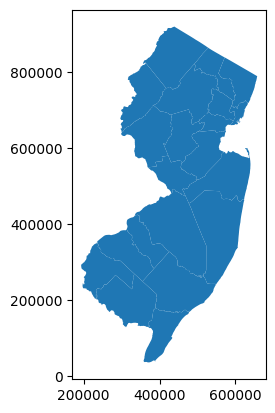

In [4]:
nj_counties.plot()


In [ ]:
!pwd

/content


In [7]:
!wget -q -O d.csv 'https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/county/mapping/110-tavg-202308-1.csv'

In [12]:
! head d.csv

August 2023 Contiguous U.S. County Average Temperature
Units: Degrees Fahrenheit
Missing: -99
Period of Record: 129 Years
ID,Name,State,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
AL-001,"Autauga County",Alabama,84.1,128,4.1,80
AL-003,"Baldwin County",Alabama,86.3,129,5.4,80.9
AL-005,"Barbour County",Alabama,83.1,127,3.2,79.9
AL-007,"Bibb County",Alabama,82.6,122,3.1,79.5
AL-009,"Blount County",Alabama,79.7,107,1.8,77.9


In [22]:
pd.read_csv('d.csv', skiprows=[0,1,2,3,4,5], sep=',',on_bad_lines='skip') # header=None

,AL-003,Baldwin County,Alabama,86.3,129,5.4,80.9
0,AL-005,Barbour County,Alabama,83.1,127,3.2,79.9
1,AL-007,Bibb County,Alabama,82.6,122,3.1,79.5
2,AL-009,Blount County,Alabama,79.7,107,1.8,77.9
3,AL-011,Bullock County,Alabama,82.9,127,3.3,79.6
4,AL-013,Butler County,Alabama,83.4,127,3.7,79.8
...,...,...,...,...,...,...,...
3099,WY-037,Sweetwater County,Wyoming,65.5,99,1.6,63.9
3100,WY-039,Teton County,Wyoming,56.0,76,0.6,55.4
3101,WY-041,Uinta County,Wyoming,61.7,88,1.2,60.5
3102,WY-043,Washakie County,Wyoming,68.9,92,1.6,67.3


In [ ]:
df=pd.read_csv(

In [8]:
#load the csv file
#temp = '../data.csv'
#df = pd.read_csv(temp, skiprows=5)
#df = df.replace(',', '', regex=True)
#print(df)
#print(df.columns)


In [ ]:
print(df.info())

In [ ]:
df['temp change'] = (df['2023 Temperature'] - df['2013 Temperature'])  / df['2023 Temperature'] * 100
print(df)

In [ ]:
print(nj_counties['COUNTY'])

0       ATLANTIC
1         BERGEN
2     BURLINGTON
3         CAMDEN
4       CAPE MAY
5     CUMBERLAND
6          ESSEX
7     GLOUCESTER
8         HUDSON
9      HUNTERDON
10        MERCER
11      MONMOUTH
12         OCEAN
13       PASSAIC
14         SALEM
15      SOMERSET
16        SUSSEX
17         UNION
18        WARREN
19        MORRIS
20     MIDDLESEX
Name: COUNTY, dtype: object


In [ ]:
#Merging and joining the counties to the data frame
nj_counties = pd.merge(
    left = nj_counties,
    right = df,
    left_on = 'COUNTY',
    right_on = 'County',
    how = 'left'
)
print(nj_counties.columns)
nj_counties.head(10)

Index(['COUNTY', 'COUNTY_LAB', 'CO', 'GNIS_NAME', 'GNIS', 'FIPSSTCO', 'FIPSCO',
       'ACRES', 'SQ_MILES', 'POP2010', 'POP2000', 'POP1990', 'POP1980',
       'POPDEN2010', 'POPDEN2000', 'POPDEN1990', 'POPDEN1980', 'REGION',
       'Shape_Leng', 'Shape_Area', 'geometry', 'County_x',
       '2013 Temperature_x', '2023 Temperature_x', 'temp change_x', 'County_y',
       '2013 Temperature_y', '2023 Temperature_y', 'temp change_y', 'County',
       '2013 Temperature', '2023 Temperature', 'temp change'],
      dtype='object')


,COUNTY,COUNTY_LAB,CO,GNIS_NAME,GNIS,FIPSSTCO,FIPSCO,ACRES,SQ_MILES,POP2010,...,2023 Temperature_x,temp change_x,County_y,2013 Temperature_y,2023 Temperature_y,temp change_y,County,2013 Temperature,2023 Temperature,temp change
0,ATLANTIC,Atlantic County,ATL,County of Atlantic,882270,34001,1,390815.404215,610.649069,274549,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BERGEN,Bergen County,BER,County of Bergen,882271,34003,3,153490.275182,239.828555,905116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BURLINGTON,Burlington County,BUR,County of Burlington,882272,34005,5,525002.683590,820.316693,448734,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CAMDEN,Camden County,CAM,County of Camden,882273,34007,7,145650.507808,227.578918,513657,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CAPE MAY,Cape May County,CAP,County of Cape May,882274,34009,9,183126.574240,286.135272,97265,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,CUMBERLAND,Cumberland County,CUM,County of Cumberland,882275,34011,11,321150.321572,501.797378,156898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ESSEX,Essex County,ESS,County of Essex,882276,34013,13,83034.859489,129.741968,783969,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,GLOUCESTER,Gloucester County,GLO,County of Gloucester,882277,34015,15,215166.893094,336.198271,288288,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,HUDSON,Hudson County,HUD,County of Hudson,882278,34017,17,32982.400794,51.535001,634266,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,HUNTERDON,Hunterdon County,HUN,County of Hunterdon,882228,34019,19,279885.206384,437.320635,128349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(nj_counties.info())
#nj_counties = nj_counties.dropna()

NameError: ignored

In [ ]:
nj_counties['temp change']

NameError: ignored

<Axes: >

Text(0.5, 1.0, 'Temperature Change in New Jersey Between 2013 and 2023')

<function matplotlib.pyplot.show(close=None, block=None)>

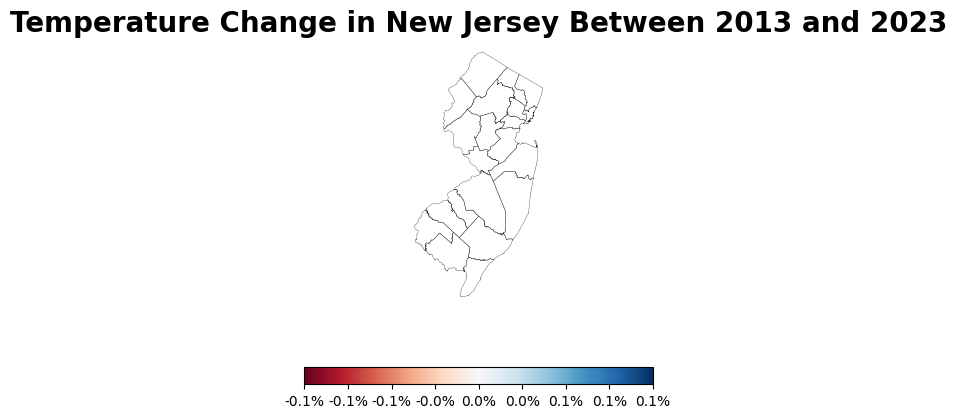

In [ ]:
ax = nj_counties.boundary.plot(edgecolor='black', linewidth=0.2, figsize=(15, 5))
nj_counties.plot(ax=ax, column='temp change', legend=True, cmap='RdBu', legend_kwds={'shrink': 0.3,
 'orientation': 'horizontal', 'format': '%.1f%%'})
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False)
ax.set_title('Temperature Change in New Jersey Between 2013 and 2023', size=20, weight='bold')
plt.show